# Kaggle Competition

#### Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

#### With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

#### We see from the data read in that we have 81 Columns. The description to each of these variables can be founnd in the data_description.txt file. Now let us perform some exploratory data analysis on the data

In [4]:
# first off, let us check the datatype of the coulmns present in the dataset
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
# we couldn't view everything so let us use the info() function which shows a more comprehensive detail of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### From the above function call, we begin to see some interesting stats about the data. We can see a lot of missing values in some of the columns already. keeping in mind the shape of our dataset. We will explore this in a while

In [6]:
# Let us give a statistical overview of the dataset using the descrbe function
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# We can transpose the result so as to see the full stat
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#### From the above produced table, we can see some interesting facts. Some columns already presenting a likelihood of outliers. Let us try to clean up our data a little starting from the missing values.

In [8]:
# first of all let us drop the id column as we see it is just integer values ranging from 1 - 1460. we use the inplace argument
# to make the drop permanent
data.drop(columns=['Id'], inplace=True)

In [9]:
# virew the columns with missing values
data.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
MSSubClass          0
Length: 80, dtype: int64

In [10]:
# let us extract only the columns with missing values so we can see it clearly. and also print the missing percentage

missing = data.isna().sum()
missing = missing[missing>0]
(missing/len(data)*100).sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

#### I would always suggest to always drop columns with over 50% of missing values. you should also check the description of the columns before deciding to drop them. Let us checkout these columns with over 50% of missing values. And also check the columns with 35-49% missing values if meaning can be found in them.
#### In this case we notice that the missing values in FirePlaceQu means there is no fireplace. so that can be fixed

In [11]:
# drop the columns with over 50% missing values
data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)

In [13]:
# let us see the relationship fireplacequ has with the sales price. from the description of the dataset we can attach
# values to the data since it is categorical. thus making it ordinal

data['FireplaceQu'].fillna(0, inplace=True)
data['FireplaceQu'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

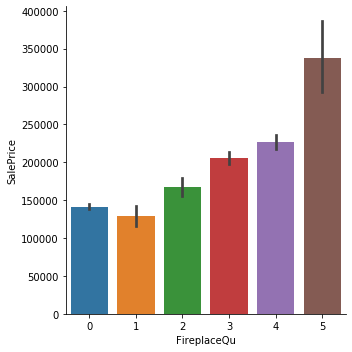

In [14]:
sns.catplot(x="FireplaceQu", y="SalePrice", kind="bar", data=data)

#### we can clearly see from the plot that the fireplace quality anf the salesprice have a positive relationship. Let us check for other ordinal data in from the missing values set and trnasform them.

In [15]:
missing_ordinal = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
for missing_values in missing_ordinal:
    data[missing_values].fillna(0, inplace=True)
    data[missing_values].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

In [16]:
# let us view the relationship between these values
from ipywidgets import widgets

features = {'ExterQual': 'ExterQual', 'ExterCond': 'ExterCond', 'BsmtQual': 'BsmtQual',
           'BsmtCond': 'BsmtCond', 'HeatingQC': 'HeatingQC', 'KitchenQual': 'KitchenQual',
           'GarageQual': 'GarageQual', 'GarageCond': 'GarageCond'}

def plot_feature(column):
    sns.catplot(x=column, y="SalePrice", kind="bar", data=data)
    
dropdown_menu = {v: k for k, v in features.items()}
widgets.interact(plot_feature, column=dropdown_menu)

interactive(children=(Dropdown(description='column', options={'ExterQual': 'ExterQual', 'ExterCond': 'ExterCon…

<function __main__.plot_feature(column)>

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
ExterQual,1460.0,3.395890,0.574280,2.0,3.00,3.0,4.00,5.0
ExterCond,1460.0,3.083562,0.351054,1.0,3.00,3.0,3.00,5.0


In [26]:
# we can fill some of the categorical data with missing values with the help of the description file

# Fills NA in place of NaN
for missing_data in ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1']:
    data[missing_data].fillna('NA', inplace=True)
    
# Fills None in place of NaN
data['MasVnrType'].fillna('None', inplace=True)

In [27]:
# now let us see the remaining values with missing data
missing = data.isna().sum()
missing = missing[missing>0]
(missing/len(data)*100).sort_values(ascending=False)

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [28]:
# let us check the data types of these columns
data_to_check = data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'Electrical']]
data_to_check.dtypes

LotFrontage    float64
GarageYrBlt    float64
MasVnrArea     float64
Electrical      object
dtype: object

In [29]:
# we notice that 3 of the columns are numerical. let us fix them. let us see the correlation they have with the salesprice
# since that has been our heuristic for retaining columns with missing values

data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'SalePrice']].corr()

,LotFrontage,GarageYrBlt,MasVnrArea,SalePrice
LotFrontage,1.000000,0.070250,0.193458,0.351799
GarageYrBlt,0.070250,1.000000,0.252691,0.486362
MasVnrArea,0.193458,0.252691,1.000000,0.477493
SalePrice,0.351799,0.486362,0.477493,1.000000


In [30]:
# we can see that the columns have a positive correlation with the sales price but this correlation is not strong enough.
# and since we will be looking to reduce the amount of features used in the prediction later, I will be dropping
# these columns
data.drop(columns=['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], inplace=True)

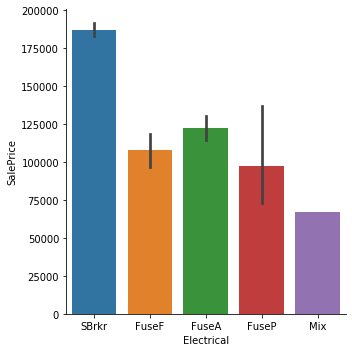

In [31]:
# the only value we haven't dealt with is the electrical. let us see the relationship against sales price
sns.catplot(x="Electrical", y="SalePrice", kind="bar", data=data)

In [32]:
# let us fill the missing values with the most common which is sbrkr.
# for easy handling of missing values I will also advise to check the sklearn.preprocessing.imputer module

data['Electrical'].fillna('SBrkr', inplace=True)

In [33]:
missing = data.isna().sum()
missing = missing[missing>0]
(missing/len(data)*100).sort_values(ascending=False)

Series([], dtype: float64)

#### now we see that we have successfully cleaned our data and performed some transformation on it.
#### Next we will be working on the other transformations and model building.

In [93]:
# import machine learning modules to use
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [94]:
# StandardScaler?
# train_test_split?
# SGDRegressor?

In [95]:
encode = OneHotEncoder(handle_unknown='ignore')
sgd = SGDRegressor(max_iter=20000)

In [96]:
pipe = Pipeline([
    ('encode', encode),
    ('sgd', sgd)
])


X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
pipe.fit(X_train, y_train)

predictions = pipe.predict(X_test)
R2 = metrics.r2_score(y_test, predictions)
MAE = metrics.mean_absolute_error(y_test, predictions)
MSE = metrics.mean_squared_error(y_test, predictions)
RMLE = metrics.mean_squared_log_error(y_test, predictions)

print(f"R2 Score: {R2}")
print(f"MAE Score: {MAE}")
print(f"MSE Score: {MSE}")
print(f"RMLE Score: {RMLE}")

R2 Score: 0.8125254680839618
MAE Score: 21887.70389970694
MSE Score: 1213568654.0159056
RMLE Score: 0.026421596749466703
